## Automobile Price Hypothesis Testing

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize': (14, 8)})
import matplotlib.pyplot as plt

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.stats.power as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

In [68]:
def read_auto_data(fileName = "auto-price.csv"):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for missing values coded as '?'
    cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)
    auto_price.drop(columns = 'normalized-losses', inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price


auto_price = read_auto_data()
auto_price.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


K-S statistic for price: KstestResult(statistic=0.15647710705386353, pvalue=0.00012307559563738856, statistic_location=-0.2468885164318045, statistic_sign=1)
K-S statistic for log price: KstestResult(statistic=0.10256317084963895, pvalue=0.030720078669758566, statistic_location=-0.4166629740304881, statistic_sign=1)


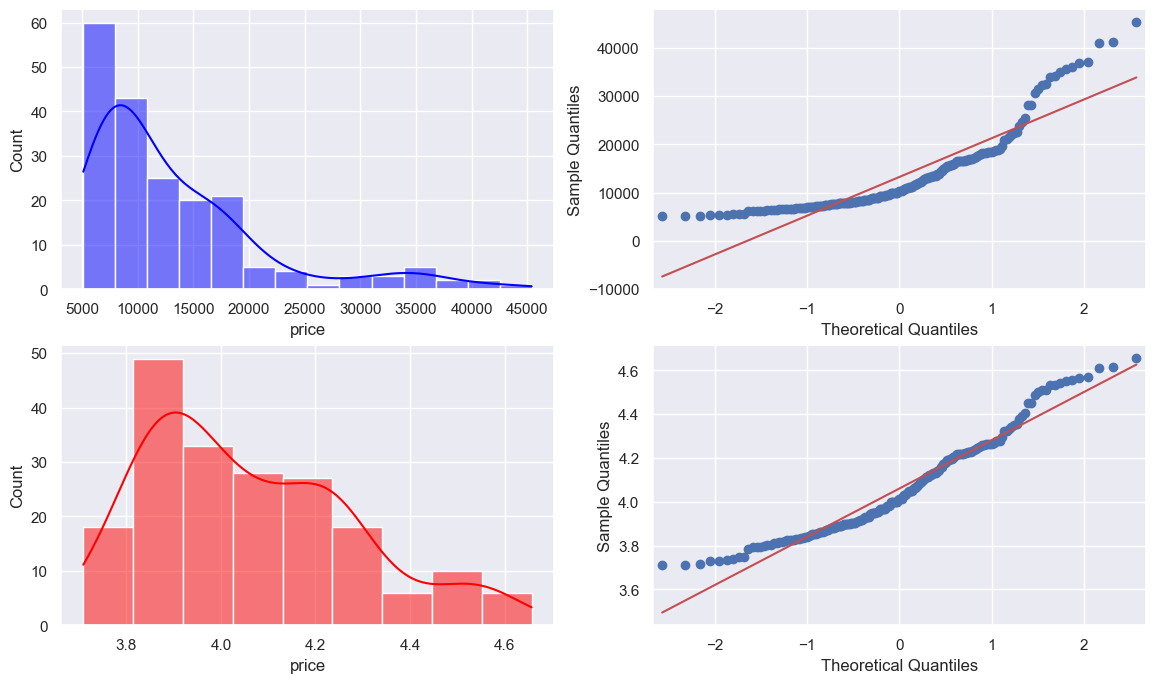

In [69]:
# Graphical method for testing normal distribution of price
fig, axs = plt.subplots(ncols = 2,nrows=2)
sns.histplot(auto_price['price'], color = 'blue', kde = True, ax = axs[0, 0])
sns.histplot(np.log10(auto_price['price']), color = 'red', kde = True, ax = axs[1,0])
sm.qqplot(auto_price['price'], line = 's', ax = axs[0,1])
sm.qqplot(np.log10(auto_price['price']), line = 's', ax = axs[1,1])

# Standardization of data for K-S formal test
price_norm = (auto_price['price'] - auto_price['price'].mean()) / auto_price['price'].std()
log_price_norm = (np.log10(auto_price['price']) - np.log10(auto_price['price']).mean()) / np.log10(auto_price['price']).std()

# Run formal K-S test and print resulting statistic and p-value
print("K-S statistic for price:", ss.kstest(price_norm, 'norm'))
print("K-S statistic for log price:", ss.kstest(log_price_norm, 'norm'))

**The null hypothesis for our tests of K-S is that price and log price are not normally distributed, alternative hypothesis being that price and log price are normally distributed. Conclusion we can draw is that the log price is a better fit for a normal distribution. We know this because p-value is higher for the log price than the price data meaning that we are closer to accepting the alternative hypothesis for log price although it is not normally distributed enough to reject the null hypothesis.**

In [70]:
sns.set(rc = {'figure.figsize': (10, 8)})

# Function to perform t-test of variables, return result (Formal test)
def t_test(a, b, alpha = 0.05, alternative = 'two-sided', type = 'independent'):
    result = ss.ttest_ind(np.log10(a), b, equal_var = False)    
    return result

A)

TtestResult(statistic=-74.72774843682723, pvalue=5.518789707700366e-25, df=19.05214100745373)

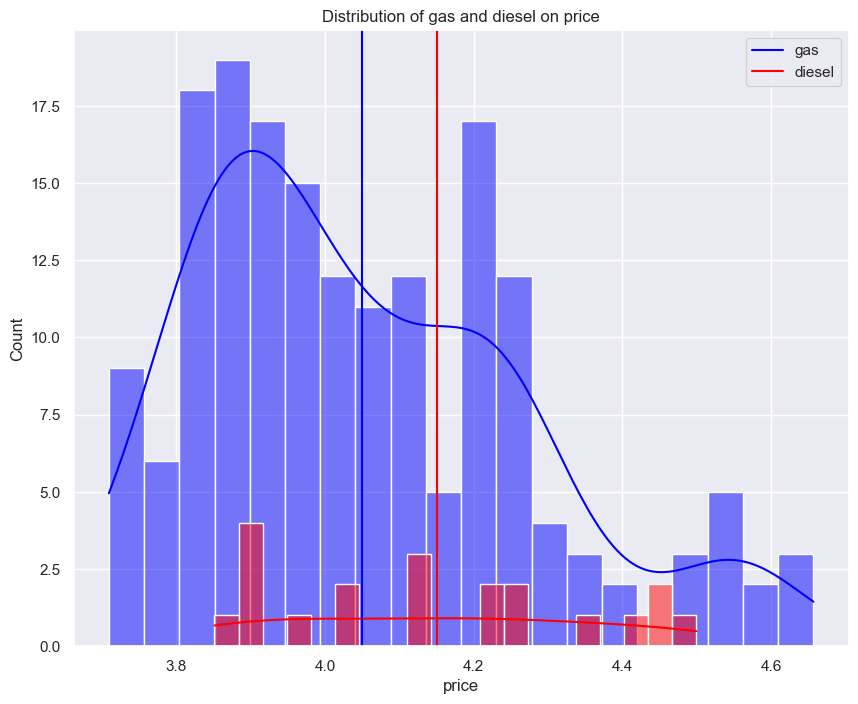

In [71]:
# Groupby fuel type from auto_price DataFrame
gas = np.log10(auto_price.groupby(['fuel-type']).get_group('gas')['price'])
diesel = np.log10(auto_price.groupby(['fuel-type']).get_group('diesel')['price'])

# Graphical test for showing distribution of price per variable
sns.histplot(gas, color = 'blue', bins = 20, kde = True)
sns.histplot(diesel, color = 'red', bins = 20, kde = True)
plt.title('Distribution of gas and diesel on price')
plt.axvline(gas.mean(), 0, color = 'blue')
plt.axvline(diesel.mean(), 0, color = 'red')
plt.legend(labels = ['gas', 'diesel'])
t_test(gas, diesel)

**T-Test to test significance of variables on log price,
Null Hypothesis: Fuel-Type has no significance on log price,
Alternative Hypothesis: Fuel-Type does have a significance on log price,
Conclusion: Fuel-Type does have a significance on log price which we can see by p-value being very low and graphical test showing difference in the distributions**

B)

TtestResult(statistic=-128.60796640122925, pvalue=8.94397180933027e-49, df=35.31654058389834)

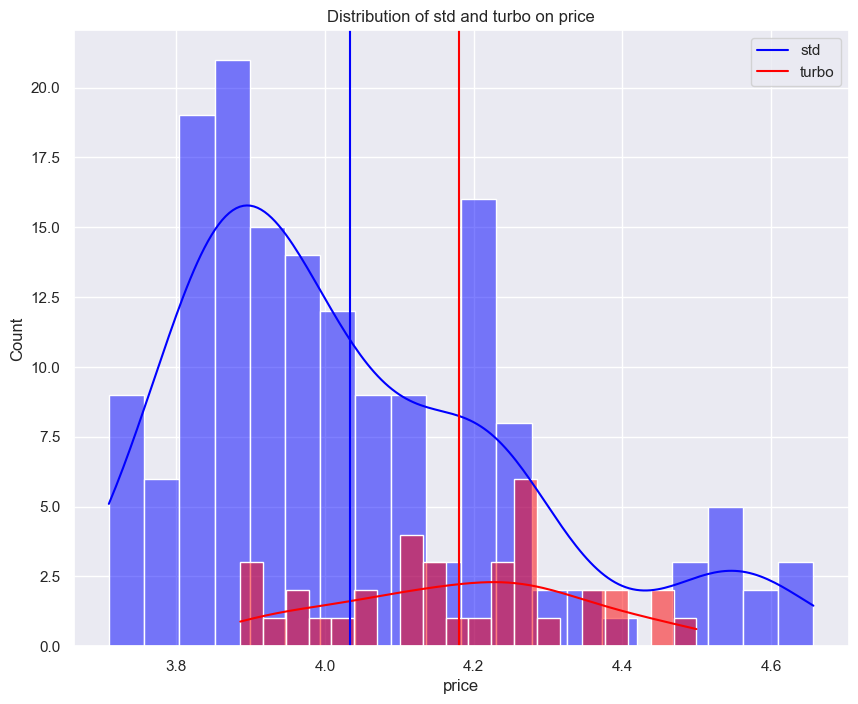

In [72]:
# Groupby aspiration from auto_price DataFrame
std = np.log10(auto_price.groupby(['aspiration']).get_group('std')['price'])
turbo = np.log10(auto_price.groupby(['aspiration']).get_group('turbo')['price'])

# Graphical test for showing distribution of price per variable
sns.histplot(std, color = 'blue', bins = 20, kde = True)
sns.histplot(turbo, color = 'red', bins = 20, kde = True)
plt.title('Distribution of std and turbo on price')
plt.axvline(std.mean(), 0, color = 'blue')
plt.axvline(turbo.mean(), 0, color = 'red')
plt.legend(labels = ['std', 'turbo']);
t_test(std, turbo)

**T-Test to test significance of variables on log price,
Null Hypothesis: Aspiration has no significance on log price,
Alternative Hypothesis: Aspiration does have a significance on log price,
Conclusion: Aspiration does have a significance on log price which we can see by p-value being very low and graphical test showing difference in the distributions**

C)

In [73]:
auto_price['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

TtestResult(statistic=-251.45634661651485, pvalue=8.206638869409275e-168, df=122.26657533570904)

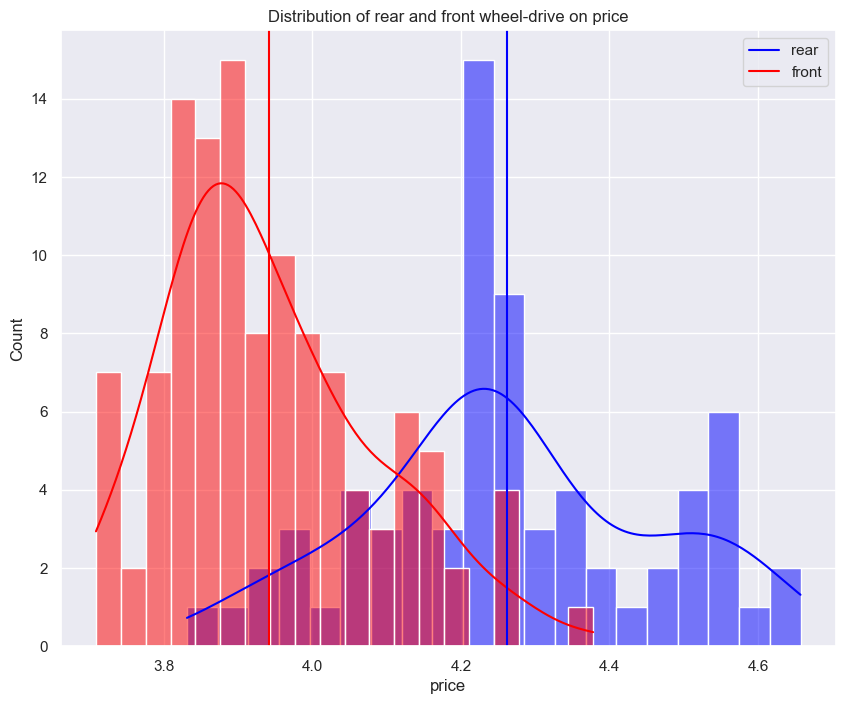

In [74]:
# Groupby re from auto_price DataFrame
rear = np.log10(auto_price.groupby(['drive-wheels']).get_group('rwd')['price'])
front = np.log10(auto_price.groupby(['drive-wheels']).get_group('fwd')['price'])

# Graphical test for showing distribution of price per variable
sns.histplot(rear, color = 'blue', bins = 20, kde = True)
sns.histplot(front, color = 'red', bins = 20, kde = True)
plt.title('Distribution of rear and front wheel-drive on price')
plt.axvline(rear.mean(), 0, color = 'blue')
plt.axvline(front.mean(), 0, color = 'red')
plt.legend(labels = ['rear', 'front']);
t_test(rear, front)

**T-Test to test significance of variables on log price,
Null Hypothesis: Drive-wheels has no significance on log price,
Alternative Hypothesis: Drive-wheels does have a significance on log price,
Conclusion: Drive-wheels does have a significance on log price which we can see by p-value being very low and graphical test showing difference in the distributions**

Apply ANOVA and Tukey's HSD test to the auto price data to compare the price of autos for different body styles.

In [75]:
# ANOVA test for comparing price of autos for different body-styles
auto_price.rename(columns={"body-style":"bodystyle"}, inplace=True)
model = ols('np.log10(price) ~ C(bodystyle)', data = auto_price).fit()
anova_table = sm.stats.anova_lm(model)
auto_price['bodystyle_predictions'] = model.predict(auto_price)
print(anova_table)

                 df    sum_sq   mean_sq        F    PR(>F)
C(bodystyle)    4.0  1.479830  0.369958  8.78754  0.000002
Residual      190.0  7.999046  0.042100      NaN       NaN


**ANOVA test for comparing log price of autos for different body-styles,
Null Hypothesis: No impact on log price based on body-style of autos
Alternative Hypothesis: Impact on log price based on body-style of autos
Conclusion: F-statistic is large and p-value is very low so we reject the null hypothesis and find that body-style of autos has significance on log price.**

In [76]:
# Tukey HSD test for pairwise body-style comparison on price
Tukey_HSD = pairwise_tukeyhsd(np.log10(auto_price['price']), auto_price['bodystyle'])
print(Tukey_HSD)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------------
convertible   hardtop   -0.042 0.9956 -0.3472  0.2632  False
convertible hatchback  -0.3411 0.0013 -0.5825 -0.0996   True
convertible     sedan  -0.1963 0.1587 -0.4342  0.0417  False
convertible     wagon  -0.2306 0.1037 -0.4886  0.0273  False
    hardtop hatchback  -0.2991 0.0013 -0.5112  -0.087   True
    hardtop     sedan  -0.1543 0.2502 -0.3624  0.0538  False
    hardtop     wagon  -0.1886 0.1654 -0.4193  0.0421  False
  hatchback     sedan   0.1448 0.0002  0.0528  0.2368   True
  hatchback     wagon   0.1105 0.1681 -0.0251   0.246  False
      sedan     wagon  -0.0343 0.9488 -0.1636  0.0949  False
------------------------------------------------------------


**Tukey HSD test for pairwise comparison of log price of autos for different body-styles,
Null Hypothesis: No impact on log price based on pairwise body-style of autos
Alternative Hypothesis: Impact on log price based on pairwise body-style of autos
Conclusion: p-values for convertible:hatchback, convertible:sedan, convertible:wagon, hardtop:sedan, hardtop:wagon, hatchback:wagon, sedan:wagon are high so we fail to reject the null hypothesis. The rest of the body-style comparisons have p-values that are low and we can reject the null hypothesis meaning that there is a significance of these body-styles on price.**

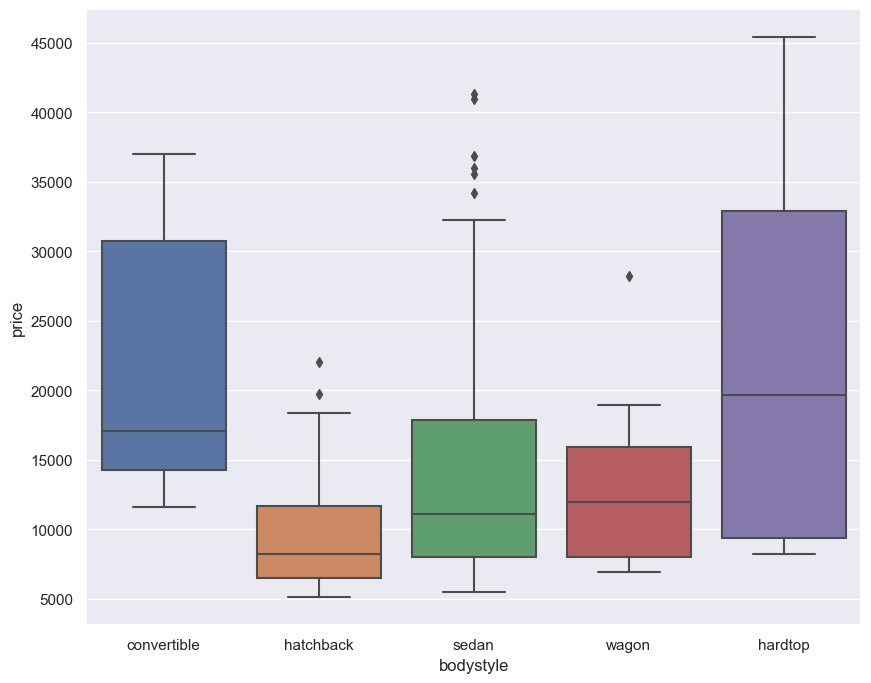

In [77]:
sns.boxplot(x = 'bodystyle', y = 'price', data = auto_price);

In [78]:
# Function to compute t_stat for power analysis
def t_stat(autoprice, group1, group2):
    group1_price = np.log10(autoprice.groupby(['bodystyle']).get_group(group1)['price'])
    group2_price = np.log10(autoprice.groupby(['bodystyle']).get_group(group2)['price'])
    group1_var, group2_var = group1_price.var(), group2_price.var()
    group1_mean, group2_mean = group1_price.mean(), group2_price.mean()
    var_P = group1_var / group1_price.size + group2_var / group2_price.size
    t_stat = (group1_mean - group2_mean) / var_P**0.5
    return t_stat

t_stat_1 = t_stat(auto_price, 'convertible', 'hatchback')
t_stat_2 = t_stat(auto_price, 'hardtop', 'hatchback')
t_stat_3 = t_stat(auto_price, 'sedan', 'hatchback')
t_stats = [t_stat_1, t_stat_2, t_stat_3]

# Print sample size of each bodystyle 
hatchback_size = auto_price.groupby(['bodystyle']).get_group('hatchback')['price'].size
convertible_size = auto_price.groupby(['bodystyle']).get_group('convertible')['price'].size
sedan_size = auto_price.groupby(['bodystyle']).get_group('sedan')['price'].size
hardtop_size = auto_price.groupby(['bodystyle']).get_group('hardtop')['price'].size

print("convertible:hatchback sample size:", convertible_size, ":", hatchback_size)
print("hardtop:hatchback sample size:", hardtop_size,":",hatchback_size)
print("hatchback:sedan sample size:", hatchback_size,":",sedan_size)

convertible:hatchback sample size: 6 : 63
hardtop:hatchback sample size: 8 : 63
hatchback:sedan sample size: 63 : 94


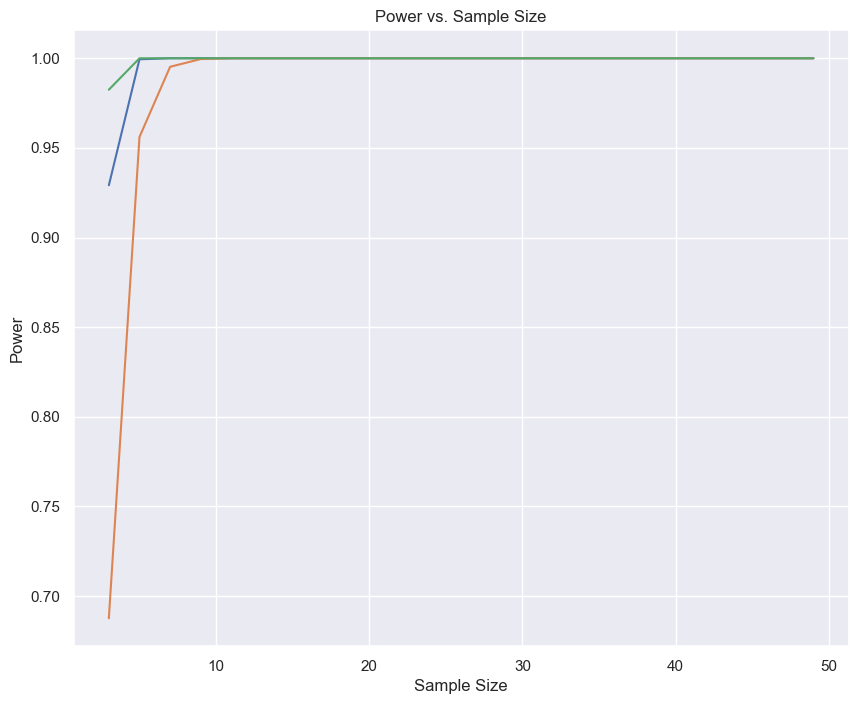

In [79]:
# Power analysis of bodystyle comparisons of price
for t in t_stats:
    sample_size = np.arange(start = 1, stop = 50, step = 2)
    power = [sp.tt_ind_solve_power(effect_size = abs(t), nobs1 = n, alpha = 0.05, 
                                   power = None, ratio = 1.0, alternative = 'two-sided') 
              for n in sample_size]


    sns.lineplot(x = sample_size, y = power)
    plt.title('Power vs. Sample Size')
    plt.xlabel('Sample Size')
    plt.ylabel('Power')

**Power analysis test of samples within body-style price comparison. We can see from our evaluation of power that for our first two tests of convertible:hatchback and hardtop:hatchback, the sample size for one of these variables is much lower so for the sample size to reach a statistical significance is ~8. The third test hatchback:sedan has a larger sample size for both variables and we can see that the statistical signficance of this result can be obtained with far less samples than the other two comparisons.**

### Citations

1. 2022-Augusts, Bahram Zahir, Lesson 6 presentation from DS520 in UW-PCE class.